In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import os
os.chdir("C:\\Users\\chint\\Desktop\\Proj\\")
import seaborn as sns

In [2]:
data=pd.read_csv('Telco_Churn_Data.csv')
data_copy= data.copy()

In [3]:
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Converting total charges to numeric
data['TotalCharges']= pd.to_numeric(data['TotalCharges'], errors='coerce')

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# checking the unique values
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [10]:
# Droping customer id, as it won't affect churn, as all values are unique
data=data.drop('customerID', axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


In [12]:
# checking for null values
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# null values for Total Charges
data[data['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
#SINCE there are only 11 rows , which is a small number of rows, we can drop these rows altogetehr from the dataset
data.dropna(how='any',inplace=True)

In [15]:
# checking missing values after dropping
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
# checking churn in target variable
data.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

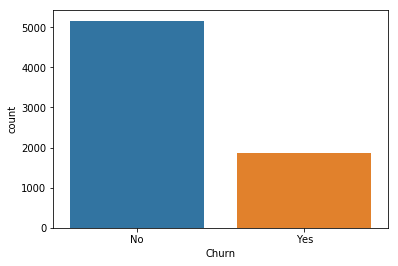

In [17]:
# checking churn in target variable

sns.countplot('Churn', data=data)

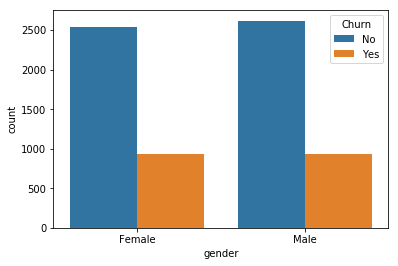

In [18]:
# checking churn based on gender
# There is almost no difference in churn ratio for male and female.

sns.countplot('gender', data=data, hue='Churn')

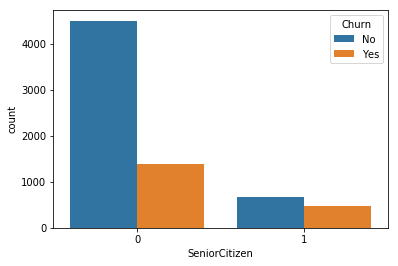

In [19]:
# checking the effect of senior citizens on churn
# Churn rate for senior citizens is significanlty higher as compared to non-senior citizens.

sns.countplot('SeniorCitizen', data=data, hue='Churn')

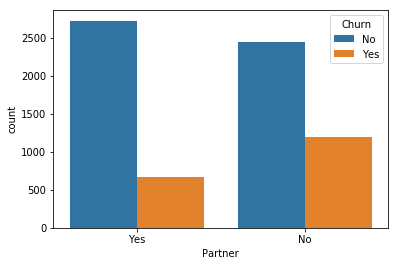

In [20]:
# Effect of Partner on churn
# churn ratio for people having partners is lower than that of the one not having a partner

sns.countplot('Partner', data=data, hue='Churn')

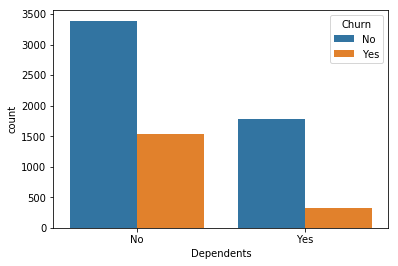

In [21]:
# Effect of dependents on churn
# People without any dependent have higher churn ratio as compared to one's having dependents.

sns.countplot('Dependents', data=data, hue='Churn')

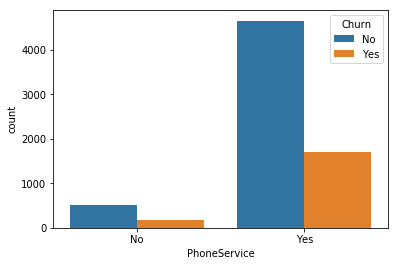

In [22]:
# Effect of phoneservice on churn
# people having phone service have higher ratio of churn
sns.countplot('PhoneService', data=data, hue='Churn')

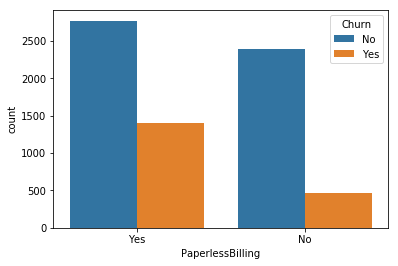

In [24]:
# Effect of Paperlessbilling
# People  haivng paperless billing have higher churn ratio as compared to having people not having paperless billing

sns.countplot('PaperlessBilling', data=data, hue='Churn')

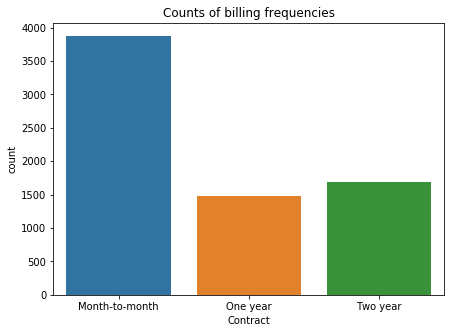

In [25]:
#counts of billing frequency or contacts
fig = plt.gcf()
fig.set_size_inches( 7, 5)
plt.title('Counts of billing frequencies')
sns.countplot(data['Contract'])

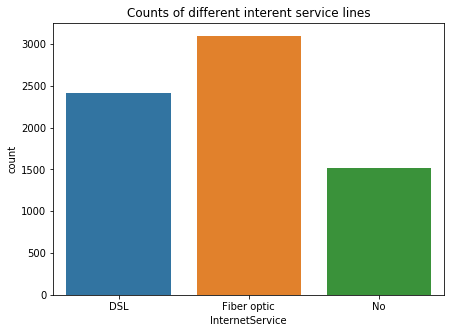

In [26]:
#Use of differnt Internet service lines
fig = plt.gcf()
fig.set_size_inches( 7, 5)
plt.title('Counts of different interent service lines')
sns.countplot(data['InternetService'])

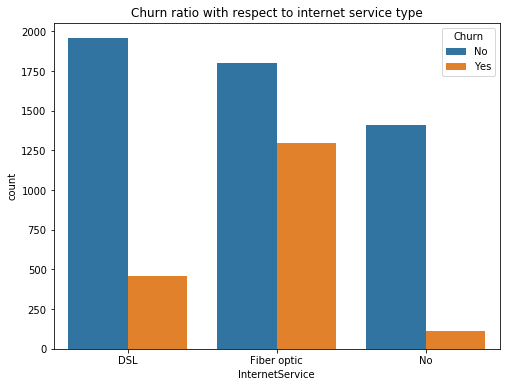

In [27]:
#Effect of churn with respect to internet service type
fig = plt.gcf()
plt.title('Churn ratio with respect to internet service type')
fig.set_size_inches( 8, 6)
sns.countplot(data['InternetService'],hue=data['Churn'])


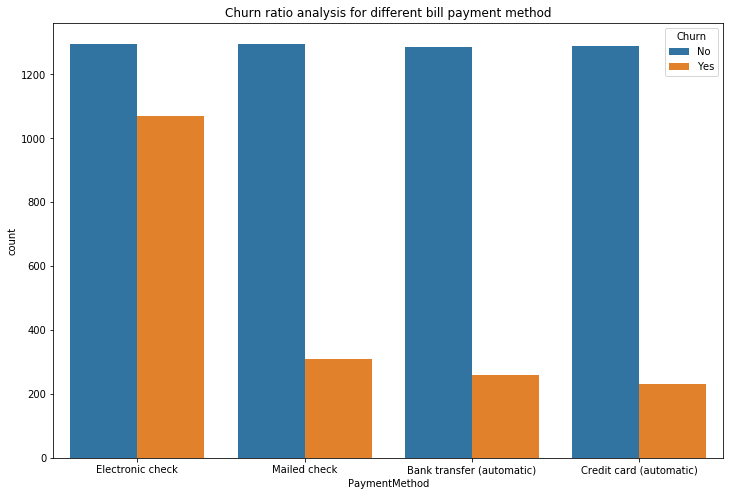

In [28]:
#Churn ratio analysis for different bill payment method
fig = plt.gcf()
fig.set_size_inches( 12, 8)
plt.title('Churn ratio analysis for different bill payment method')
sns.countplot(data['PaymentMethod'],hue=data['Churn'])

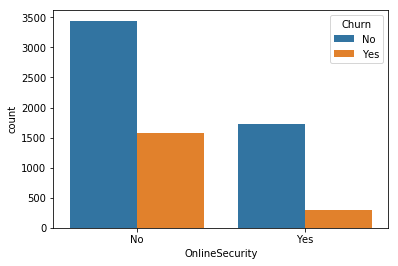

In [29]:
# Effect of onlinesecurity on churn
# churn ratio for customers not having online security feature is higher in comparison to those having it
sns.countplot('OnlineSecurity', data=data, hue='Churn')

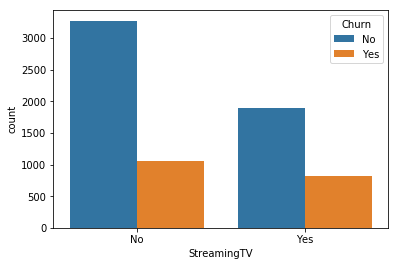

In [30]:
# Effect of streaming TV on churn
# Churn ratio is higher for people not having streaming tv.
sns.countplot('StreamingTV', data=data, hue='Churn')

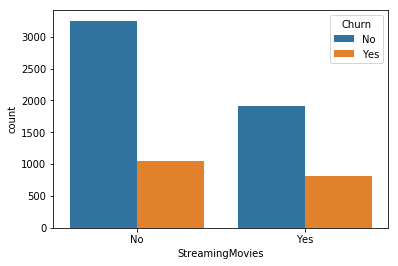

In [31]:
# Effect of streamingmovies on churn
# Churn ratio for people having StreamingMovies service is higher
sns.countplot('StreamingMovies', data=data, hue='Churn')

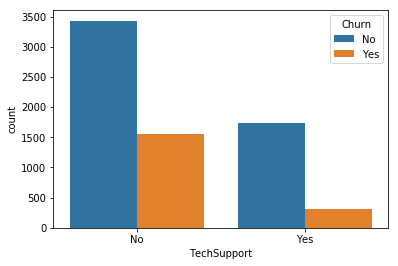

In [32]:
# churn ratio for tech support
# People not having tech support have higher churn ratio as compared to having it
sns.countplot('TechSupport', data=data, hue='Churn')

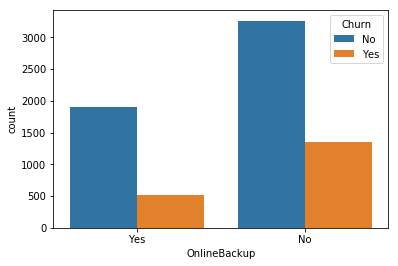

In [33]:
# Effect of churn on onlineBackUp
# People who don't have online backup service have higher churn ratio
sns.countplot('OnlineBackup', data=data, hue='Churn')

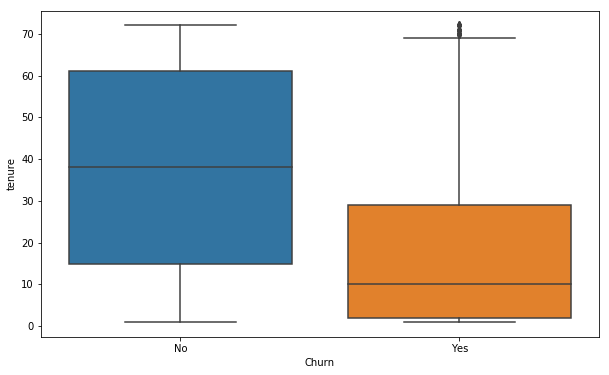

In [34]:
# Effect of tenure on churn
# customer churn in period more of over 10 months

plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'tenure', data=data)

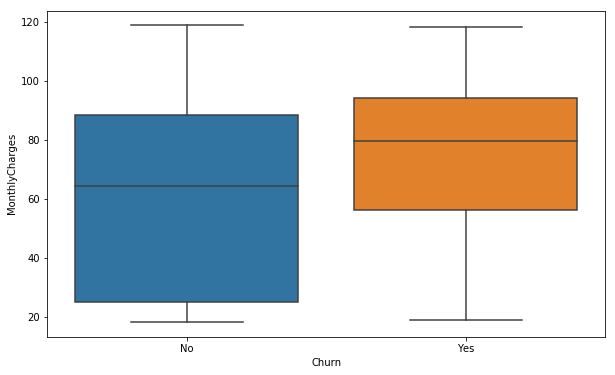

In [35]:
# Effect of Monthly charges on churn
#Customer churning are paying more monthly charges as compared to non-churn customers.
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='Churn', y = 'MonthlyCharges', data=data)

In [36]:
# Dividing into dependent and independent variable
y = data['Churn'].map({'Yes':1,'No':0})
X = data.drop(labels=['Churn'],axis=1).copy()

In [37]:
X.shape

(7032, 19)

In [38]:
y.shape

(7032,)

In [39]:
#find list of categorical columns for encoding
cat_cols = []
for column in X.columns:
    if column not in ['tenure','MonthlyCharges','TotalCharges']:
        cat_cols.append(column)

In [40]:
#Convert categorical columns to binary
X= pd.get_dummies(X,columns=cat_cols)

In [41]:
#shape after conversion of categorical features
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [42]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [43]:
#create seperate train and test splits for validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [45]:
# Model 1- logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8137882018479033


AxesSubplot(0.125,0.125;0.775x0.755)


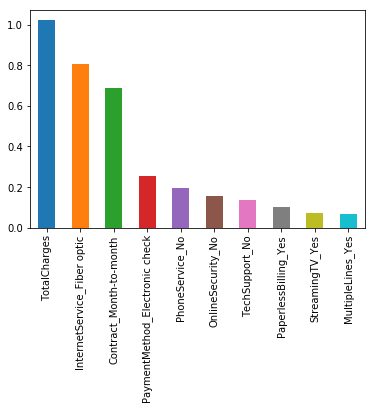

In [46]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


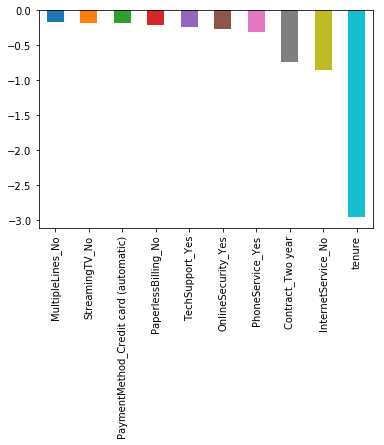

In [47]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [48]:
# Model 2 Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8130774697938877


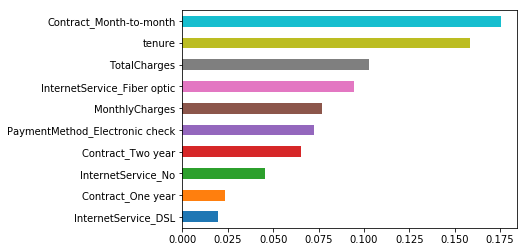

In [49]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [50]:
# Model 3 SVM
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8073916133617626